# Practical work 08 - Clustering 

In [7]:
import numpy as np
import _pickle as pickle
import matplotlib.pyplot as plt
import random
from math import hypot,sqrt

%matplotlib inline 


### Exercice 1

a) Load the two given datasets


In [8]:
data1,label1 = pickle.load(open("./PW08/dataset_1.pkl", "rb"), encoding ="latin1")
data2,label2 = pickle.load(open("./PW08/dataset_2.pkl", "rb"), encoding ="latin1")


b) Visualize the data using various color for each unique labels like in figure 1 :

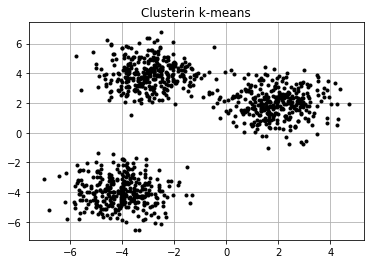

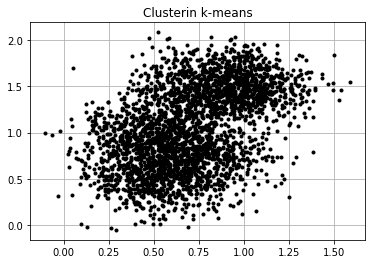

In [9]:
def create_scatterplot_bandw(data, label, plot_title= "Clusterin k-means", centroids = None):
    plt.figure()

    for d, c in zip(data, label):
        plt.plot(d[0], d[1], color = "black", marker = ".") 
    
    if centroids is not None:
        for x,y in centroids:
            plt.plot(x, y, color = "black", marker = "+", markersize=6)
    plt.title(plot_title)    
    plt.grid(True)
    plt.show()
    
create_scatterplot_bandw(data1, label1)
create_scatterplot_bandw(data2, label2)


    

In [10]:
def create_scatterplot(data, label, plot_title= "Clusterin k-means", centroids = None, k=1):
    cmap = plt.get_cmap('jet')
    colors = colors = cmap(np.linspace(0, 1.0, k+1))

    plt.figure()

    for d, c in zip(data, label):
        plt.plot(d[0], d[1], color = colors[c], marker = ".") 
    
    if centroids is not None:
        for x,y in centroids:
            plt.plot(x, y, color = colors[-1], marker = "X",markersize=6)
    plt.title(plot_title)    
    plt.grid(True)
    plt.show()
    



### Exercice 2 The k-means algorithm

a) Initialise the centroids $\mu_1, \mu_2, ... , \mu_K$

In [11]:
def init_centroids(K, data):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:K].tolist()

b) Until convergence :

    i) Find the closest centroid for each point

In [12]:
def distance(data_point, centroid):
    return sqrt((data_point[0] - centroid[0])**2 + (data_point[1] - centroid[1])**2)

def find_closest(data, centroids):
    label = []
    for d in data:
        closest = min(centroids, key = lambda i: distance(d, i))
        label.append(centroids.index(closest))
        
    return label


ii) Reevaluate the centroids

In [13]:
def reevaluate_centroids(data, label):
    centroids = []
    dic = {}
    for d,l in zip(data,label):
        if l not in dic:
            dic[l] = [d]
        else:
            dic[l].append(d)
    for key, value in dic.items():      
        tmp = np.mean(value, axis= 0).tolist()
        centroids.append(tmp)
    
    return centroids


c) Return the centroids and the label predicted.

In [14]:
def not_close_enough(old_centroids, new_centroids, threshold):
    check = []
    for old, new in zip (old_centroids, new_centroids):
        check.append(distance(old,new))
    criteria = np.mean(check)
    return [all(i >= threshold for i in check), criteria]

In [28]:
def distortion(data, label, centroids):
    dic = {}
    J = []
    for d,l in zip(data,label):
        if l not in dic:
            dic[l] = [d]
        else:
            dic[l].append(d)
    for key, value in dic.items():
        distort = []
        for v in value:
            distort.append(distance(centroids[key],list(v))**2)
        J.append(sum(distort))
        
    return sum(J)/len(J)

In [29]:
def kmean(data,label, k, threshold):
    centroids = init_centroids(k, data)
    flag = True
    itr = 0
    criteria = []
    while flag:
        itr += 1
        new_labels = find_closest(data, centroids)
        new_centroids = reevaluate_centroids(data, new_labels)
        converged = not_close_enough(centroids, new_centroids, threshold)
        
        flag = converged[0]
        criteria.append(converged[1])
        if flag:
            centroids = new_centroids
    print('K-means converged after %d iterations'  % itr)   
    
    J = distortion(data,label,centroids)
        
    return data, label, centroids, criteria, J



### Exercice 3 Evaluate your model



In [17]:
result_data1 = kmean(data1,label1,3,0.0001)

K-means converged after 2 iterations


- Visualize your convergence criteria over the epochs 1 using the dataset 1.

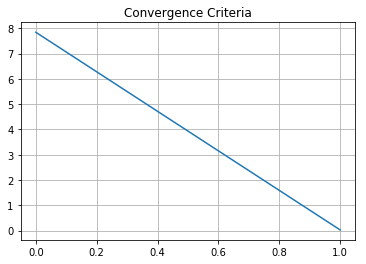

In [19]:
plt.plot(result_data1[3])
plt.title("Convergence Criteria")
plt.grid(True)
plt.show()

- Visualize the output of your k-means on the dataset 1

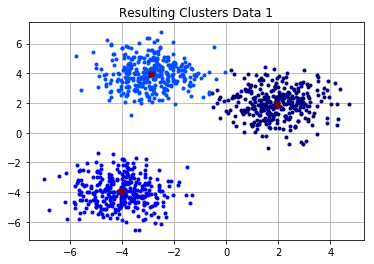

In [23]:
create_scatterplot(result_data1[0],result_data1[1],"Resulting Clusters Data 1", result_data1[2], k = 10)

### Dataset 2 - lets pretend we don't know the classes.

In [25]:
data2,label2 = pickle.load(open("./PW08/dataset_2.pkl", "rb"), encoding ="latin1")


In [26]:
results_k = []
for i in range(1,11):
    results_k.append(kmean(data2,label2,i,0.0001))

K-means converged after 2 iterations
K-means converged after 8 iterations


K-means converged after 25 iterations


K-means converged after 14 iterations


K-means converged after 15 iterations


K-means converged after 23 iterations


K-means converged after 14 iterations


K-means converged after 23 iterations


K-means converged after 19 iterations


K-means converged after 14 iterations


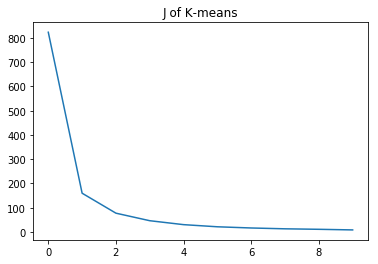

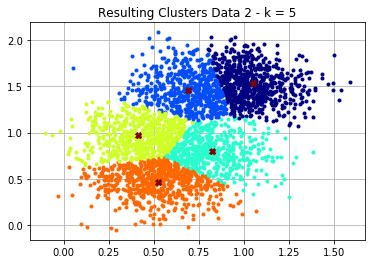

In [27]:
Js = []
for j in results_k:
    Js.append(j[4])

plt.figure()
plt.plot(Js)
plt.title("J of K-means")
plt.show()

create_scatterplot(results_k[4][0],results_k[4][1],"Resulting Clusters Data 2 - k = 5", results_k[4][2], k = 5)